Hi Yonatan. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review <a class="tocSkip">

You've worked really hard and submitted a solid project.  While there's room for improvement, on the whole, your project is looking good. There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. You're almost there!

# Project description

**Context**

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

## Description of the data
**Data used in the first part of the project**

`/datasets/hypotheses_us.csv`

* `Hypotheses` — brief descriptions of the hypotheses
* `Reach` — user reach, on a scale of one to ten
* `Impact` — impact on users, on a scale of one to ten
* `Confidence` — confidence in the hypothesis, on a scale of one to ten
* `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the `Effort` value, the more resource-intensive the test.

**Data used in the second part of the project**

`/datasets/orders_us.csv`

* `transactionId` — order identifier
* `visitorId` — identifier of the user who placed the order
* `date` — of the order
* `revenue` — from the order
* `group` — the A/B test group that the user belongs to

`/datasets/visits_us.csv`

* `date` — date
* `group` — A/B test group
* `visits` — the number of visits on the date specified in the A/B test group specified

**Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.**


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you clearly described the project and data.
</div>

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

# Part 1. Prioritizing Hypotheses

The file `hypotheses_us.csv` contains nine hypotheses on boosting an online store's revenue with `Reach`, `Impact`, `Confidence`, and `Effort` specified for each.

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you brought columns to the lower case.
</div>

* Apply the `ICE` framework to prioritize hypotheses. Sort them in descending order of priority.

In [3]:
hypotheses['ICE'] = ((hypotheses.impact * hypotheses.confidence) / hypotheses.effort).round(2)
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.20
0,Add two new channels for attracting traffic. T...,13.33
7,Add a subscription form to all the main pages....,11.20
6,Show banners with current offers and sales on ...,8.00
2,Add product recommendation blocks to the store...,7.00
1,Launch your own delivery service. This will sh...,2.00
5,Add a customer review page. This will increase...,1.33
3,Change the category structure. This will incre...,1.12
4,Change the background color on the main page. ...,1.00


* Apply the `RICE` framework to prioritize hypotheses. Sort them in descending order of priority.

In [4]:
hypotheses['RICE'] = ((hypotheses.reach * hypotheses.impact * hypotheses.confidence)/ hypotheses.effort).round(2)
hypotheses.sort_values('RICE', ascending=False, inplace=True)
hypotheses.reset_index(inplace=True, drop=True)
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add a subscription form to all the main pages....,10,7,8,5,11.20,112.0
1,Add product recommendation blocks to the store...,8,3,7,3,7.00,56.0
2,Add two new channels for attracting traffic. T...,3,10,8,6,13.33,40.0
3,Show banners with current offers and sales on ...,5,3,8,3,8.00,40.0
4,Launch a promotion that gives users discounts ...,1,9,9,5,16.20,16.2
5,Change the category structure. This will incre...,8,3,3,8,1.12,9.0
6,Launch your own delivery service. This will sh...,2,5,4,10,2.00,4.0
7,Add a customer review page. This will increase...,3,2,2,3,1.33,4.0
8,Change the background color on the main page. ...,3,1,1,1,1.00,3.0


* Show how the prioritization of hypotheses changes when you use `RICE` instead of `ICE`. 

In [5]:
def priority(row):
    return row.name + 1

hypotheses['Rice_priority'] = hypotheses.apply(priority, axis=1)
hypotheses.sort_values('ICE', ascending=False, inplace=True)

In [6]:
hypotheses.reset_index(inplace=True, drop=True)
hypotheses['Ice_priority'] = hypotheses.apply(priority, axis=1)
hypotheses.sort_values('Rice_priority')

,hypothesis,reach,impact,confidence,effort,ICE,RICE,Rice_priority,Ice_priority
2,Add a subscription form to all the main pages....,10,7,8,5,11.20,112.0,1,3
4,Add product recommendation blocks to the store...,8,3,7,3,7.00,56.0,2,5
1,Add two new channels for attracting traffic. T...,3,10,8,6,13.33,40.0,3,2
3,Show banners with current offers and sales on ...,5,3,8,3,8.00,40.0,4,4
0,Launch a promotion that gives users discounts ...,1,9,9,5,16.20,16.2,5,1
7,Change the category structure. This will incre...,8,3,3,8,1.12,9.0,6,8
5,Launch your own delivery service. This will sh...,2,5,4,10,2.00,4.0,7,6
6,Add a customer review page. This will increase...,3,2,2,3,1.33,4.0,8,7
8,Change the background color on the main page. ...,3,1,1,1,1.00,3.0,9,9


* Provide an explanation for the changes.

Let's check the first row:
* ICE = (7 * 8) / 5 = 11.2
* RICE = (**10** * 7 * 8) / 5 = **112**

So, we can see that the fact of having additional number in the numerator has a significant impact on the result.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You correctly calculated ICE scores and identified the highest priority hypotheses. It will be nice to show RICE and ICE scores on the same plot. This makes it easier to analyze.
</div>

## Preprocessing

In [7]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders['date'] = pd.to_datetime(orders['date'])

visits = pd.read_csv('/datasets/visits_us.csv', sep=',')
visits['date'] = pd.to_datetime(visits['date'])

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You are right, it's necessary to change data types.
</div>

### Tables

In [8]:
display(orders.head())
visits.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
display(orders.info())
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
display(orders.describe())
visits.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [11]:
display(orders.duplicated().sum())
visits.duplicated().sum()

0

0

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly noted that we don't have duplicates in data.
</div>

In [12]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

ordersByUsersA.sort_values('orders').tail(5)

,visitorId,orders
23,237748145,4
269,2378935119,4
278,2458001652,5
227,2038680547,5
499,4256040402,7


In [13]:
ordersByUsersAB=ordersByUsersA.merge(ordersByUsersB,left_on='visitorId',right_on='visitorId')
display(ordersByUsersAB.head())
ordersByUsersAB.shape[0]

,visitorId,orders_x,orders_y
0,8300375,1,1
1,199603092,4,1
2,232979603,1,1
3,237748145,4,1
4,276558944,1,1


58

In [14]:
indices = ordersByUsersAB.visitorId.index

orders.drop(indices, inplace = True)
orders.head()

,transactionId,visitorId,date,revenue,group
58,2145193898,1221478247,2019-08-16,25.2,B
59,2787983461,2115666868,2019-08-16,125.9,B
60,1421016313,4256040402,2019-08-16,875.5,B
61,1251767592,2712142231,2019-08-16,15.2,B
62,1286673508,567175747,2019-08-16,10.2,B


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you checked data for users belonging to both groups. You are right, it will be better to remove these users.
</div>

In [15]:
orders.shape[0]

1139

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check are there any missing values?
    
Please note that it’s necessary to add a conclusion for each part of the project. 
</div>

# Part 2. A/B Test Analysis

You carried out an A/B test and got the results described in the files `orders_us.csv` and `visits_us.csv`.

**Task**

Analyze the A/B test:

#### Graph cumulative revenue by group. Make conclusions and conjectures.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Please note that you it's possible to avoid warnings (if necessary) by using the code below.
</div>

In [28]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

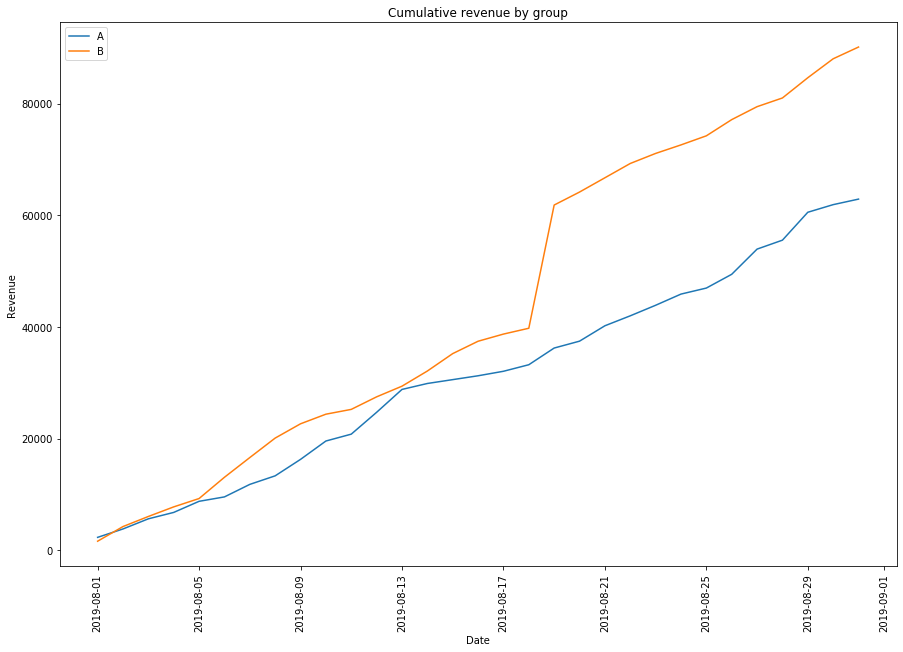

In [29]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] \
                    <= x['date'], orders['group'] == x['group'])].agg({'date': 'max',\
                        'group': 'max','transactionId': pd.Series.nunique,\
                        'visitorId': pd.Series.nunique, 'revenue': 'sum',}),axis=1,)\
                        .sort_values(by=['date', 'group'])

visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] \
                <= x['date'], visits['group'] == x['group'])].agg({'date': 'max', \
                'group': 'max', 'visits': 'sum'}), axis=1,).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], \
                 right_on=['date', 'group'])

cumulativeData.columns = ['date','group','orders','buyers','revenue','visitors']


cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,10))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Cumulative revenue by group')
plt.legend()
plt.show()

It looks like group B does better in terms of cumulative revenue.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
During 17-18 of August we have increase of cumulative revenue for group B. Could you please explain it? (What is the possible reason of it)?
</div>

#### Graph cumulative average order size by group. Make conclusions and conjectures.

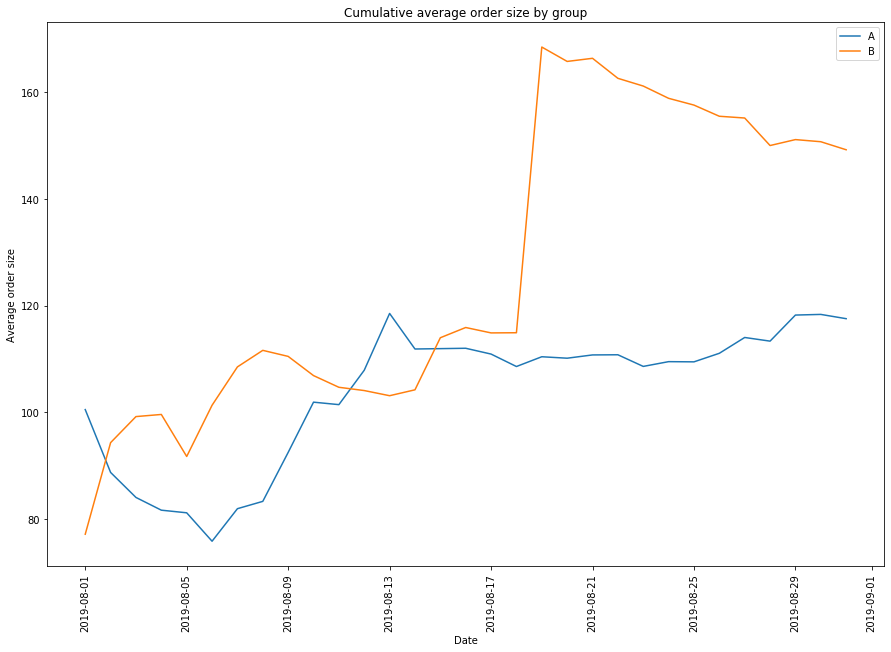

In [17]:
plt.figure(figsize=(15,10))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Average order size')
plt.title('Cumulative average order size by group')
plt.show()

It looks like group B does better in terms of cumulative average order size.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you are right, it looks like group B does better in terms of cumulative average order size.
</div>

#### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

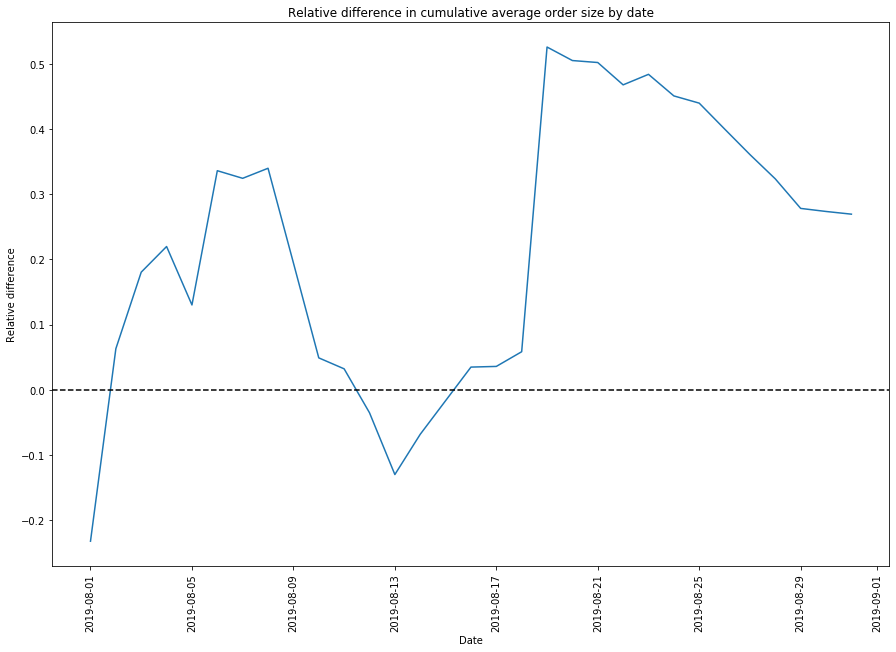

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, \
                        left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,10))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/\
        mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/\
        mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Relative difference')
plt.title('Relative difference in cumulative average order size by date')
plt.show()

It looks like group B does better in terms of cumulative average order size compared with group A.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Also we can not ethat we have an outliers in data.
</div>

#### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

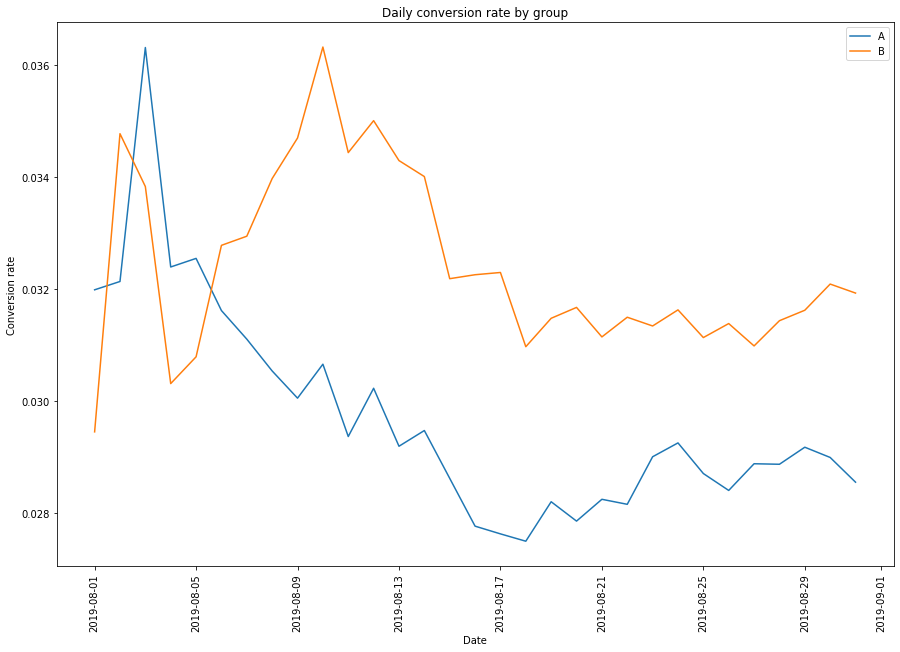

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,10))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Conversion rate')
plt.title('Daily conversion rate by group')
plt.show()


It looks like group B does better in terms of daily conversion rate.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
We have a fluctuations, but it oscillates around the same values. So, we can conclude that the conversion rate is stabilized by the end of the test.
</div>

#### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

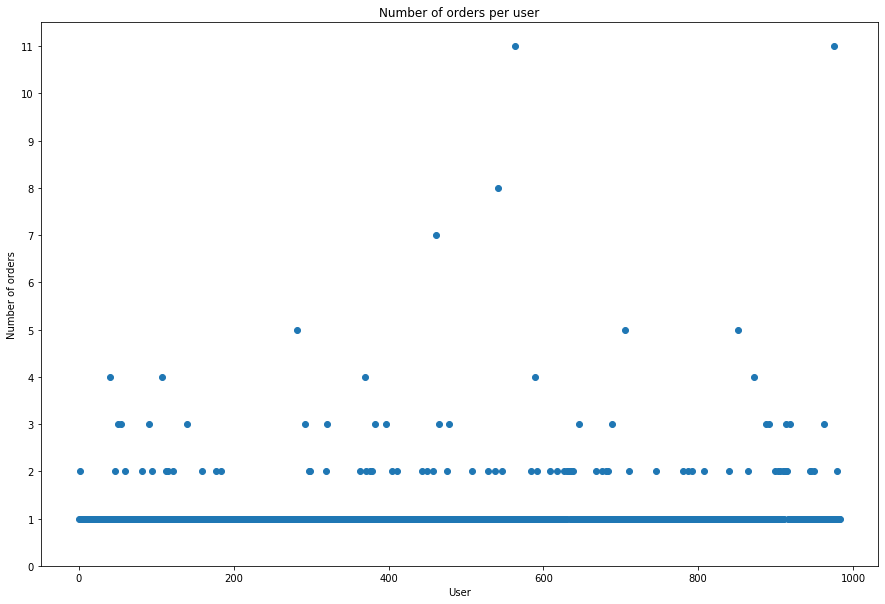

In [20]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)
                .agg({'transactionId': pd.Series.nunique}))

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,10))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.xlabel('User')
plt.ylabel('Number of orders')
plt.title('Number of orders per user')
plt.yticks(np.arange(0, ordersByUsers.orders.max() + 1, 1)) 
plt.show()

We can see that most of the users have 1,2 or 3 orders, but we also have ouliers of 7,8 and even 11(!) orders.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

#### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [21]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Data points above 2 are anomalies (above 95th percentiles).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you calulated more percentiles than specified in the task.
    
Yes, the anomaly point in number of transactions per user is correctly defined.
</div>

#### Plot a scatter chart of order prices. Make conclusions and conjectures.

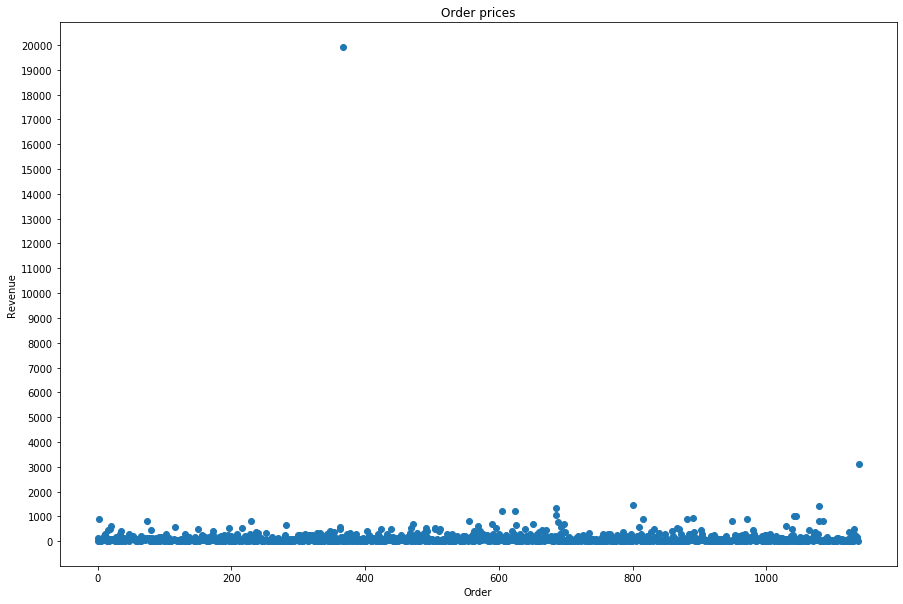

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,10))

plt.scatter(x_values, orders['revenue']) 

plt.xlabel('Order')
plt.ylabel('Revenue')
plt.title('Order prices')
plt.yticks(np.arange(0, orders.revenue.max() + 1000, 1000)) 
plt.show()

We can see that most of the order prices are below 1000.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
👍👍👍
</div>

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [23]:
np.percentile(orders.revenue, [90, 95, 99])

array([285.3  , 440.8  , 903.862])

Order prices above 440 are anomalies (above 95th percentiles).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, correct values of percentiles of order prices. Well done that you clearly defined the point at which a data point becomes an anomaly.
</div>

#### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please formulate the null and alternative hypotheses explicitly.
</div>

In [24]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.02352
0.118


The p-value is considerably lower than 0.05, so we reject the null hypothesis. The raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 11.8%. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, there is a statistical significant difference in conversion rates.
</div>

#### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please formulate hypotheses clearly.
</div>

In [25]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.332
0.269


The p-value is greater than 0.05, so there are no statistically significant differences between the groups' average order sizes. The relative difference is 26.9%.  

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, there is no statistically significant difference in the average order size.
</div>

#### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please add hypotheses formulation?
</div>

In [26]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                      ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 440]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates()
                .sort_values())

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01973
0.149


The p-value is considerably lower than 0.05, so we reject the null hypothesis. The raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 14.9%.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You are right, there is a statistical significant difference in conversion rates between groups.
</div>

#### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please formulate the null and alternative hypotheses explicitly?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you have removed an anomaly users. But please describe conditions for filtering these users.
</div>

In [27]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(
        orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(orders[np.logical_and(orders['group']=='B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId']
    .isin(abnormalUsers)))]['revenue'].mean() - 1))

0.449
-0.013


The p-value is greater than 0.05, so there are no statistically significant differences between the groups' average order sizes. The relative difference is -1.3%. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you are right, anomaly users don't have influence on the test results.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Maybe this link will be interesting for you: https://machinelearningmastery.com/statistical-hypothesis-tests/, https://www.isdscotland.org/About-ISD/Methodologies/_docs/Hypothesis-Testing-v0-4-2018-11-27.pdf 
</div>

#### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

Stop the test, consider B the leader.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please describe all main results of the project (data preparation, anomalies, main findings and so on)?
    
The conclusion is intended to help the reader understand why your research should matter to them after they have finished reading the paper. A conclusion is not merely a summary of your points or a re-statement of your research problem but a synthesis of key points. 
</div>